In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
x,y = make_blobs(n_samples = 500 , n_features = 2 , centers = 5 , random_state = 3)

In [7]:
x.shape

(500, 2)

In [8]:
x

array([[-6.94238952e+00, -6.88072230e+00],
       [ 8.14492336e+00,  7.52724561e+00],
       [-3.61995355e+00, -7.72691339e-02],
       [-8.91918262e+00, -6.77218900e+00],
       [-7.37151112e+00, -5.05064290e+00],
       [-4.65743008e+00,  5.07750808e-02],
       [-9.85614721e+00, -1.94829844e+00],
       [-7.03064028e+00, -7.47212242e+00],
       [ 7.44598269e+00,  9.20313614e+00],
       [-6.74761638e+00, -5.40793452e+00],
       [ 8.73872704e+00,  5.97009465e+00],
       [-3.89871930e+00,  1.52191932e-01],
       [ 8.84851188e+00,  9.26501008e+00],
       [-6.83038032e+00, -7.68741713e+00],
       [-4.65780461e+00,  5.13396635e-01],
       [-9.14747586e+00, -5.83583269e+00],
       [ 8.27287322e+00,  6.92062212e+00],
       [-6.67147607e+00, -5.89031942e+00],
       [-7.33837507e+00, -5.96439930e+00],
       [ 6.96905011e+00,  6.34491640e+00],
       [ 1.87879015e+00,  3.51452443e+00],
       [ 1.46173901e+00,  3.38024741e+00],
       [-7.82304106e+00, -6.34230341e+00],
       [-3.

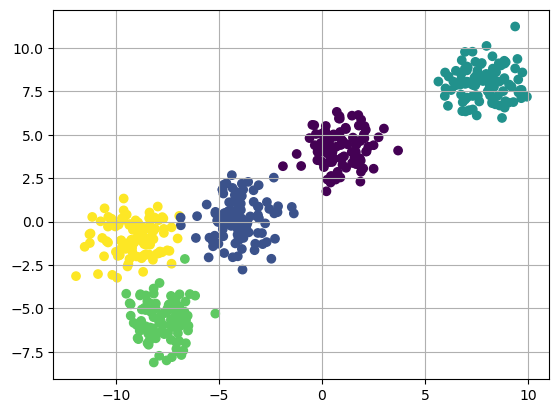

In [9]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[: , 0] , x[: , 1] , c= y)
plt.show()

In [10]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for i in range(k):
    center = 10*(np.random.random((x.shape[1]))-1)
    points = []
    cluster = {
        'center' : center,
        'points'  : [],
        'color' : colors[i]
    }
    clusters[i]=cluster

In [11]:
clusters

{0: {'center': array([-4.6760761 , -7.49876585]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-7.18102227, -7.91234398]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-9.12919091, -5.54482223]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-8.58673618, -0.79010156]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-8.10977556, -3.42629337]),
  'points': [],
  'color': 'red'}}

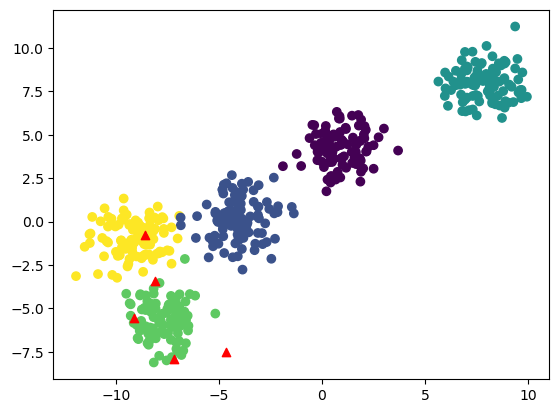

In [13]:
plt.scatter(x[: , 0] , x[: , 1] ,c=y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
    

In [18]:
def distance(v1 , v2):
    return np.sqrt(np.sum(v1-v2)**2)

In [16]:
#implementing E-step
def assign_clusters():
    for i in range(x.shape[0]):
        dist = []
        curr_x = x[i]
        for i in range(k):
            dis  = distance(curr_x , clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist) 
        clusters[curr_cluster]["points"].append(curr_x)

#implementing M-step
def update_clusters():
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0] >0:
            new_center = pts.mean(axis = 0)
            clusters[i]['center']=new_center
            clusters[i]['points'] = []

def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[: , 0],pts[: ,1], c = clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')
            

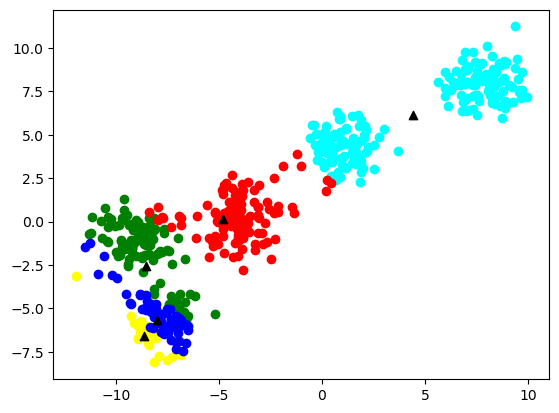

In [23]:
assign_clusters()
plot_clusters()
update_clusters()

## sklearn k-mean


In [25]:
from sklearn.cluster import KMeans

In [29]:
km = KMeans(n_clusters = 5)

In [30]:
x,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

In [31]:
km.fit(x,y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [32]:
centers = km.cluster_centers_

In [33]:
labels = km.labels_

In [34]:
centers

array([[-7.6726196 , -5.69211059],
       [ 7.8649674 ,  7.97988109],
       [ 0.88641907,  4.19441853],
       [-3.97953526,  0.19458336],
       [-9.0671623 , -0.96740759]])

In [35]:
labels

array([0, 1, 3, 0, 0, 3, 4, 0, 1, 0, 1, 3, 1, 0, 3, 0, 1, 0, 0, 1, 2, 2,
       0, 3, 0, 2, 4, 4, 3, 4, 0, 4, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 4, 4,
       3, 1, 1, 4, 4, 4, 1, 0, 4, 0, 0, 2, 0, 0, 1, 3, 1, 3, 3, 0, 4, 1,
       3, 3, 2, 3, 2, 0, 2, 0, 2, 3, 0, 4, 2, 2, 3, 2, 3, 4, 1, 4, 3, 1,
       4, 3, 4, 2, 0, 2, 2, 1, 0, 3, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 3, 0,
       1, 4, 0, 1, 3, 2, 1, 4, 2, 3, 1, 3, 4, 0, 2, 4, 4, 4, 0, 0, 3, 3,
       0, 1, 1, 4, 3, 4, 3, 0, 0, 2, 3, 1, 4, 0, 1, 1, 0, 3, 0, 0, 3, 3,
       1, 2, 2, 4, 3, 0, 2, 1, 4, 2, 1, 2, 1, 2, 2, 2, 4, 0, 2, 1, 2, 4,
       0, 3, 1, 4, 1, 0, 1, 2, 4, 4, 2, 0, 3, 1, 2, 3, 4, 0, 4, 2, 3, 4,
       0, 0, 0, 2, 2, 1, 0, 4, 4, 0, 1, 0, 0, 0, 2, 1, 3, 1, 0, 0, 1, 4,
       3, 4, 4, 2, 0, 3, 0, 3, 4, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 2, 2, 1,
       0, 0, 3, 3, 2, 1, 2, 0, 4, 1, 4, 0, 4, 4, 4, 4, 1, 2, 1, 0, 2, 1,
       4, 3, 1, 1, 1, 4, 0, 0, 3, 2, 2, 1, 3, 3, 0, 3, 4, 3, 1, 1, 4, 4,
       2, 4, 4, 1, 2, 0, 3, 2, 3, 4, 3, 3, 1, 0, 2,

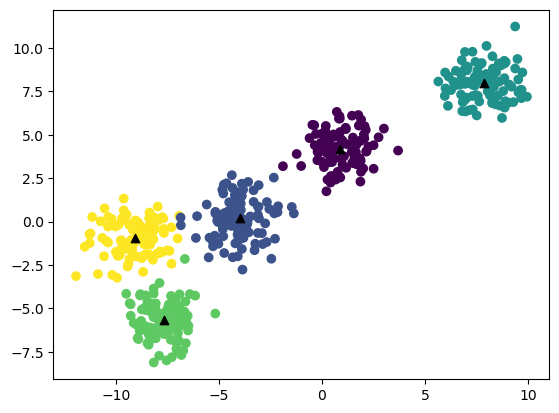

In [40]:
plt.scatter(x[:,0],x[:,1] , c=y)
plt.scatter(centers[:,0] ,centers[:,1], c="black" , marker = "^")
plt.show()